# Mini-Project on COVID19 Data Analysis using Python 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import folium

<h3>Section 1: COVID19 dataset <text>&</text> Libraries </h3>

<div class="alert alert-info">
<h8>Visualize the data for India, China and US countries<h8> 
</div>

<div class="alert alert-info">
<b>Load the data frim time series covid 19 confirmed cases</b> 
</div>

In [2]:
df = pd.read_csv('time_series_covid_19_confirmed.csv')

<div class="alert alert-info">
<b>Droppint the lat and long columns</b> 
</div>

In [3]:
df.drop(['Lat', 'Long'],axis=1,inplace=True)

In [4]:
dates = df.columns[4:]
renaming_column_date = df.melt(
    id_vars=['Province/State', 'Country/Region'],
    value_vars=dates,
    var_name='Date'
)

<div class="alert alert-info">
<b>Conversion of the date from 1/24/2020 to 2020-01-24</b> 
</div>

In [5]:
renaming_column_date['Date'] = pd.to_datetime(renaming_column_date['Date'])

In [7]:
country_wise_count = renaming_column_date.groupby(['Country/Region'],as_index=False).agg({'value': 'sum'})

<div class="alert alert-block alert-info">
<b>This is used to find the spike happended worldwide for covid 19 confirmed cases:</b> 
</div>

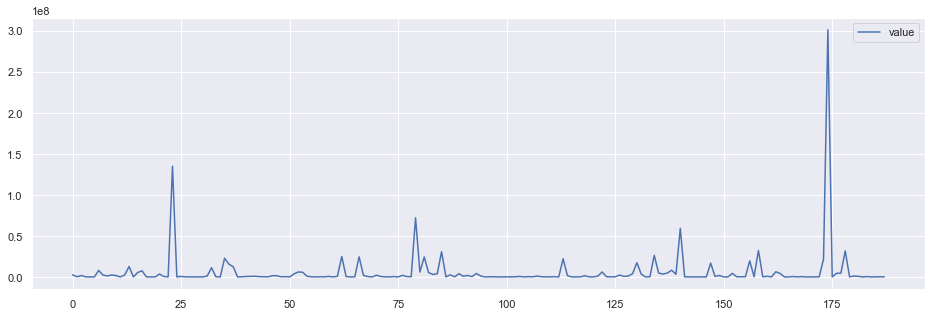

In [8]:
sns.set();
country_wise_count.plot(figsize=(16,5));

<div class="alert alert-dark">
<h2>Approaches followed to Visualizing the data across 3 countries: India, China and US</h2>
  <p>Method followed was:</p>
  <ul>
    <li>Changed the location of date from column header to row wise
        <ul>
            <li>Used melt</li>      
        </ul>
      </li>
    <li>Conversion of data from MM/DD/YYYY to YYYY-MM-DD</li>
    <li>Grouped the country wise list as we were having statewise data</li>
    <li>Used diff() method to get proper plot instead of going with traditional way that is use only plot() which give us plain <b>plot</b> </li>
  </ul>
</div>

<div class="alert alert-block alert-info">
<b><strong>India COVID growth in span of months</strong></b> 
</div>

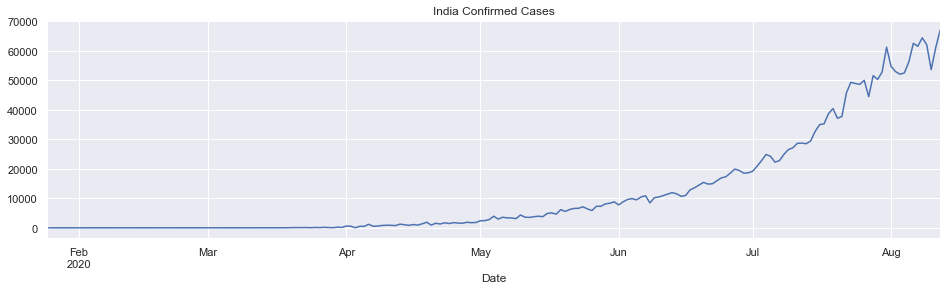

In [9]:
sns.set()
covid_confirmed_cases = renaming_column_date[renaming_column_date['Country/Region'] == 'India']
confirmed_cases_India = covid_confirmed_cases.groupby(['Date']).agg({'value': 'sum'})
confirmed_cases_India['value'].diff().plot(figsize=(16,4), title='India Confirmed Cases').autoscale(axis='x',tight=True);

<div class="alert alert-block alert-info">
<b><strong>US</strong> COVID growth in span of months</b> 
</div>

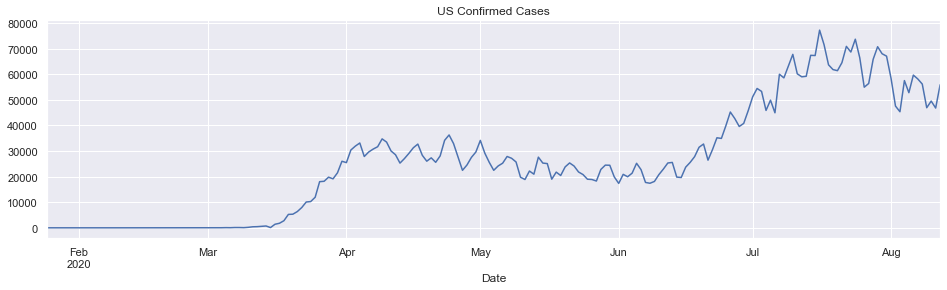

In [130]:
sns.set()
covid_confirmed_cases = renaming_column_date[renaming_column_date['Country/Region'] == 'US']
confirmed_cases_US = covid_confirmed_cases.groupby(['Date']).agg({'value': 'sum'})
confirmed_cases_US['value'].diff().plot(figsize=(16,4), title='US Confirmed Cases').autoscale(axis='x',tight=True);

<div class="alert alert-block alert-info">
<b><strong>CHINA</strong> COVID growth in span of months</b> 
</div>

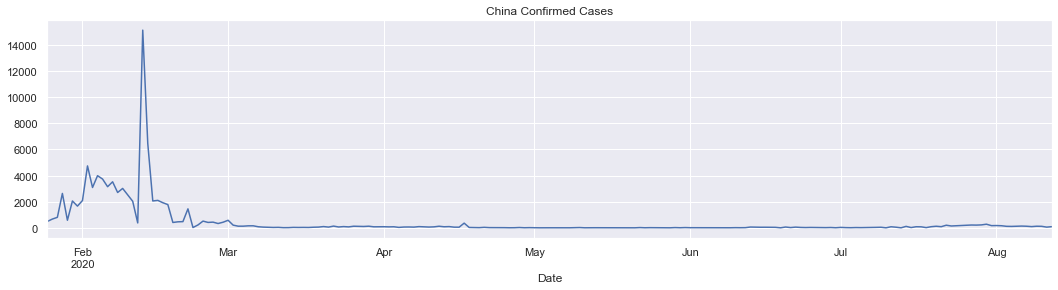

In [132]:
sns.set()
covid_confirmed_cases = renaming_column_date[renaming_column_date['Country/Region'] == 'China']
confirmed_cases_China = covid_confirmed_cases.groupby(['Date']).agg({'value': 'sum'})
confirmed_cases_China['value'].diff().plot(figsize=(18,4), title='China Confirmed Cases').autoscale(axis='x',tight=True);

# Section 2: Finding a good Measure

In [134]:
covid_data_agg = df.groupby(['Country/Region']).sum()
covid_data_agg

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
Albania,0,0,0,0,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
Algeria,0,0,0,0,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
Andorra,0,0,0,0,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
Angola,0,0,0,0,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,12541,12770,13065,13398,13722,13928,14208,14510,14875,15184
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
Yemen,0,0,0,0,0,0,0,0,0,0,...,1734,1760,1763,1768,1796,1797,1804,1832,1831,1841


<div class="alert alert-info">
<b>India highest spike as per the data set</b> 
</div>

In [135]:
max_inc_India = covid_data_agg.loc['India'].diff().max()
print('Highest Day spike on India: ' + str(max_inc_India))

Highest Day spike on India: 66999.0


<div class="alert alert-info">
<b>US's highest spike as per the data set</b> 
</div>

In [136]:
max_inc_US = covid_data_agg.loc['US'].diff().max()
print('Highest Day spike on USA : ' + str(max_inc_US))

Highest Day spike on USA : 77255.0


<div class="alert alert-info">
<b>China's highest spike as per the data set</b> 
</div>

In [137]:
max_inc_China = covid_data_agg.loc['China'].diff().max()
print('Highest Day spike on China : ' + str(max_inc_China))

Highest Day spike on China : 15136.0


<div class="alert alert-info">
<b>Plotting the Infection Rate in India</b> 
</div>

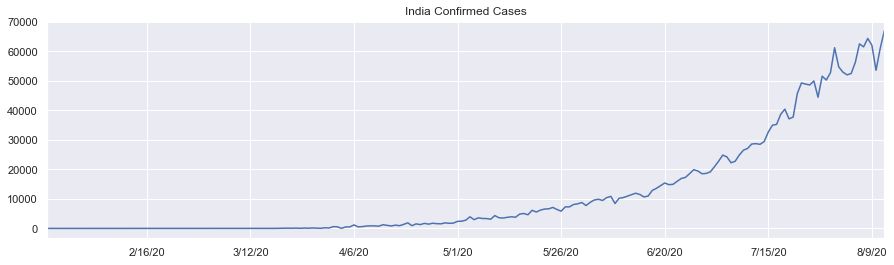

In [138]:
max_inc_India = covid_data_agg.loc['India'].diff().plot(figsize=(15,4), title='India Confirmed Cases').autoscale(axis='x',tight=True);

<h4>A. Maximum <b>‘Infection Rate’</b> for each country and store it in a new column named ‘max_infection_rate’</h4>

<div class="alert alert-dark">
<h4>Approaches followed for adding a new column to the existing Data Sets</h4>
  <p>Method followed was:</p>
  <ul>
    <li>Finding out the list of unique countries from the data by using:
        <ul>
            <li>unique() - method</li>      
        </ul>
      </li>
    <li>Creating an empty list</li>
    <li>Iterating everything in a loop by using the list</li>
    <li>Appending with created empty list and stroing the values under colums</li>
  </ul>
</div>

In [17]:
countries = list(df['Country/Region'].unique())
max_infections = []
for c in countries: 
    max_infections.append(covid_data_agg.loc[c].diff().max())

# Add to the data
covid_data_agg['max_infection_rate'] = max_infections

In [18]:
covid_data_agg

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36782,36829,36896,37015,37054,37054,37162,37269,37345,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,5750,5889,6016,6151,6275,6411,6536,6676,6817,141.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,32504,33055,33626,34155,34693,35160,35712,36204,36699,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,939,939,944,955,955,955,963,963,977,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,1344,1395,1483,1538,1572,1672,1679,1735,1762,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,12770,13065,13398,13722,13928,14208,14510,14875,15184,501.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1760,1763,1768,1796,1797,1804,1832,1831,1841,116.0


#### Create a New Data Frame name ‘Corona Data’ with ‘Country/Region’ as an index and 'max_infection_rate’ as a column

In [19]:
# Create a new dataframe 
Corona_Data = pd.DataFrame(covid_data_agg['max_infection_rate'])
Corona_Data.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,141.0
Algeria,675.0
Andorra,79.0
Angola,100.0


# Section 3: World happiness report dataset

<div class="alert alert-info">
<b>Load the data sets of worldwise happiness report</b> 
</div>

In [140]:
happiness_data = pd.read_csv('worldwide_happiness_report.csv')
happiness_data.shape

(156, 9)

<div class="alert alert-info">
<b>Drop 'Overall rank', 'Score', 'Generosity', 'Perceptions of corruption' columns. Set ‘Country or region’ column as Index</b> 
</div>

In [141]:
dropping_cols = ['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']
# Drop the useless cols 
happiness_data.drop(dropping_cols, inplace=True, axis=1)
happiness_data

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...,...
151,Rwanda,0.359,0.711,0.614,0.555
152,Tanzania,0.476,0.885,0.499,0.417
153,Afghanistan,0.350,0.517,0.361,0.000
154,Central African Republic,0.026,0.000,0.105,0.225


<h5>Task:Create a DataFrame named ‘data’ by merging ‘happiness_report’ with ‘Corona Data’ and find correlation among all variables </h5>

<div class="alert alert-info">
<b>Creating a data frame of data with happiness report with created corona data</b> 
</div>

In [142]:
happiness_data.set_index(['Country or region'], inplace=True)

In [143]:
data = Corona_Data.join(happiness_data,how='inner')
data

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,141.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,7663.0,1.092,1.432,0.881,0.471
Armenia,771.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,1150.0,0.960,1.427,0.805,0.154
Vietnam,50.0,0.741,1.346,0.851,0.543
Yemen,116.0,0.287,1.163,0.463,0.143
Zambia,915.0,0.578,1.058,0.426,0.431


<div class="alert alert-info">
<b>Find correlation among all variables</b> 
</div>

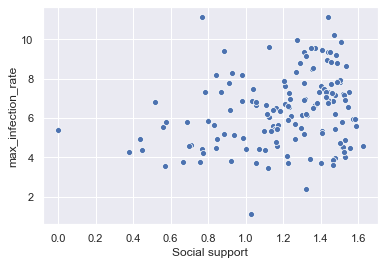

In [144]:
x = data['Social support']
y = data['max_infection_rate']

sns.scatterplot(x, np.log(y))

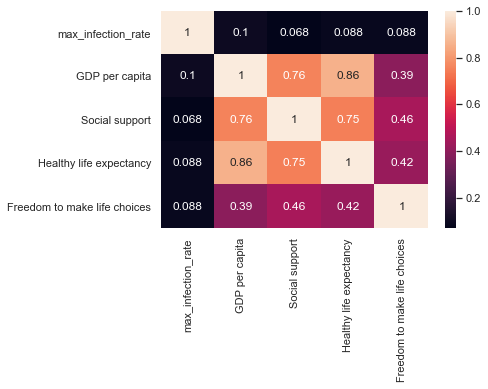

In [145]:
sns.heatmap(data.corr(), annot=True)

# Section 4: Visualization using Folium Map Task:

##### Task: Add the Latitude & Longitude information of countries in ‘data’ and Visualize it using Folium world map

In [173]:
covid_data_2 = pd.read_csv('covid_19_confirmed_dataset.csv')

In [174]:
group_c = covid_data_2.groupby('Country/Region').sum()
df_lo = pd.DataFrame(group_c) 
df_location_co = df_lo[['Lat', 'Long']]

In [154]:
data= df_location_co.join(happiness_data,how='inner')

,Lat,Long,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,33.939110,67.709953,0.350,0.517,0.361,0.000
Albania,41.153300,20.168300,0.947,0.848,0.874,0.383
Algeria,28.033900,1.659600,1.002,1.160,0.785,0.086
Argentina,-38.416100,-63.616700,1.092,1.432,0.881,0.471
Armenia,40.069100,45.038200,0.850,1.055,0.815,0.283
...,...,...,...,...,...,...
Venezuela,6.423800,-66.589700,0.960,1.427,0.805,0.154
Vietnam,14.058324,108.277199,0.741,1.346,0.851,0.543
Yemen,15.552727,48.516388,0.287,1.163,0.463,0.143
Zambia,-13.133897,27.849332,0.578,1.058,0.426,0.431


In [207]:
#  center map on mean of Latitude/Longitude
map_world = folium.Map(location=[data['Lat'].mean(), data['Long'].mean()], tiles = 'stamenterrain', zoom_start = 2)

#  add Locations to map
for lat, lng, social, healthy,GDP,freedom in zip(data['Lat'], data['Long'],data['Social support'],data['Healthy life expectancy'],data['GDP per capita'],data['Freedom to make life choices']):
    folium.CircleMarker(
        location = [lat, lng],
        radius=3,
        tooltip = 
        "<li><b>Social support: </b>"+str(social)+"</li>"+
        "<li><b>Healthy life expectancy: </b>"+str(healthy)+"</li>"+
        "<li><b>GDP: </b>"+str(GDP)+"</li>"+
        "<li><b>Freedom: </b>"+str(freedom)+"</li>"
        ,        
        fill=True,
        color='Blue',
        fill_color='Yellow',
        fill_opacity=0.6
        ).add_to(map_world)

#  display interactive map
map_world

In [208]:
map_world.save('world_data.html')
# Import the Folium interactive html file


from IPython.display import HTML
HTML('<iframe src=world_data.html width=990 height=650></iframe>')

<div class="alert alert-info">
<b>Another Approach</b> 
</div>

In [192]:
world_map = folium.Map(location=[data['Lat'].mean(),data['Long'].mean()],tiles='cartodbpositron',zoom_start=2)
for i in range(0,len(data[data['GDP per capita']>0].index)):
    folium.CircleMarker(
        location=[data.iloc[i]['Lat'],data.iloc[i]['Long']],
        tooltip = "<h5>"+data.iloc[i].name+"</h5>"+
        "<li>GDP:"+str(data.iloc[i]['GDP per capita'])+"</li>"+
        "<li>Social Support:"+str(data.iloc[i]['Social support'])+"</li>"+
        "<li>Healthy life expectancy:"+str(data.iloc[i]['Healthy life expectancy'])+"</li>"+
        "<li>Freedom to make life choices:"+str(data.iloc[i]['Freedom to make life choices'])+"</li>",        
        radius = 3,
        color = '#008000',
        fill_color = '#008000',
        fill=True
    ).add_to(world_map)
world_map

In [205]:
world_map.save('world_data_map.html')
# Import the Folium interactive html file


from IPython.display import HTML
HTML('<iframe src=world_data_map.html width=990 height=650></iframe>')

### Section 5: Visualization of results using Seaborn.

**Task**: Based on the plot above, comment on the Indicators having strong relationship with COVID19 Infection?

__Hint:__
 - Plotting GDP vs maximum Infection rate
 - Plotting Social support vs maximum Infection rate
 - Plotting Healthy life expectancy vs maximum Infection rate
 - Plotting Freedom to make life choices vs maximum Infection rate

In [175]:
data_p = Corona_Data.join(happiness_data,how='inner')
data_p

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,141.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,7663.0,1.092,1.432,0.881,0.471
Armenia,771.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,1150.0,0.960,1.427,0.805,0.154
Vietnam,50.0,0.741,1.346,0.851,0.543
Yemen,116.0,0.287,1.163,0.463,0.143
Zambia,915.0,0.578,1.058,0.426,0.431


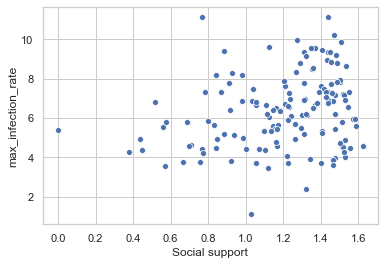

In [177]:
x_social = data_p['Social support']
x_GDP = data_p['GDP per capita']
x_Healthy = data_p['Healthy life expectancy']
x_freedom = data_p['Freedom to make life choices']

y = data_p['max_infection_rate']

sns.set_style("whitegrid")
sns.scatterplot(x_social, np.log(y));

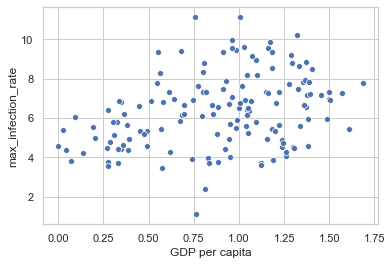

In [148]:
sns.scatterplot(x_GDP, np.log(y));

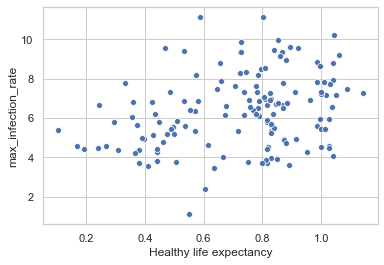

In [149]:
sns.scatterplot(x_Healthy, np.log(y));

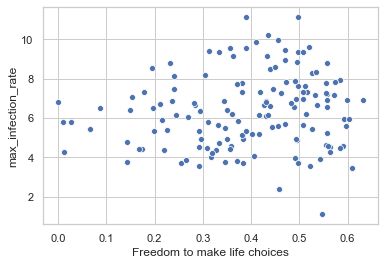

In [150]:
sns.scatterplot(x_freedom, np.log(y));

Renaming of the column name was needed to get rid of spacing between the values

In [ ]:
data_rename = data_p.rename(columns={"GDP per capita": "GDP", "Social support": "Social", "Healthy life expectancy":"Healthy", "Freedom to make life choices": "Freedom"})
data_rename